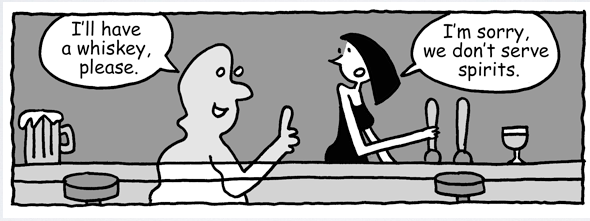

In [67]:
from IPython.display import Image
Image(filename='imgs/ws1.png', embed=True)

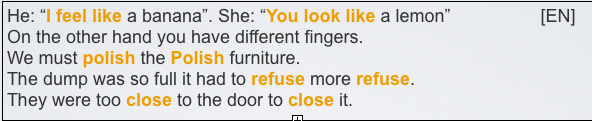

In [68]:
from IPython.display import Image
Image(filename='imgs/ws2.png', embed=True)

# Working with Bag of Words

-------------------------------------

- Automatic Summarization
- Bots! Pew bot, Hubbot! image me drunk.
- Translations
- Named Entity Recognition
- Natural Language generation
- Optical Character Recognition (OCR)
- Part of Speech tagging (POS)
- Parsing
- Question Answering
- Sentiment Analysis
- Speech Recognition
- Word sense disambiguation
- Information Retrieval
- Stemming
- Heaps More! 

<h2><li>We need the capacity to automatically recognize content in this data. We need the power to compute huge operations over this information, replacing the hard/slow work needed by a human.</li></h2>

<h1>Motivation</h1>
<hr>

<h2><li>The complexity:  Ambiguity inherited in human language. Different words with same meaning, same word with different meanings,  non deterministic and non computable grammars, difficulty of represent in the computer the real world semantic...</li></h2>

<h1>Basic Operations of NLP </h1>
<h1>Tokenization</h1>
<hr>
    
<h2><li>The process of splitting text into smaller pieces or units. </li>
<li>We vant tokenize text into sentences, and sentences into tokens.</li>
    <li>The library provides a tokenization module, nltk.tokenize</li>
</h2>

In [69]:
import nltk #dirty, but we will use it laterz
from nltk import sent_tokenize, word_tokenize

In [70]:
sentences = sent_tokenize("The world is huge. All human populations possess language! This includes populations, \
such as the Tasmanians and the Andamanese, who may have been isolated from the Old World continents for as long as 40,000 years. \
All the pugs speak a language that we can not understand."
) 

sentences

['The world is huge.',
 'All human populations possess language!',
 'This includes populations, such as the Tasmanians and the Andamanese, who may have been isolated from the Old World continents for as long as 40,000 years.',
 'All the pugs speak a language that we can not understand.']

In [71]:
tokens = word_tokenize(sentences[1])
tokens

['All', 'human', 'populations', 'possess', 'language', '!']

<h1>POS Tagging</h1>
<hr>
<h2><li>The process of tagging each word, into a lexical category: Noun, Adjective, Verb, etc... </li></h2>
<h2><li>This is useful, for higher analysis level. For example, disambiguation, structure analysis, as we will see further </li></h2>

In [72]:
from nltk import pos_tag 
#this is a Classifier, given a token assign a class
#pos_tag Already defined in the library. We can train our own. 

In [73]:
tags = pos_tag(tokens)
tags

[('All', 'DT'),
 ('human', 'JJ'),
 ('populations', 'NNS'),
 ('possess', 'JJ'),
 ('language', 'NN'),
 ('!', '.')]

<h1>Word Senses</h1>
<h3><li>In linguistics, a word sense is one of the meanings of a word. </li></h3>
<h3><li>Until now, we worked with tokens and POS. So, for instance in "the man sit down on the bench near the river.", the token [bench] could be bench as a constructed object by humans where people sit, or the natural side where the river meets the land.</li></h3>

<h3><li>WordNet: A semantic graph for words. NLTK provides a interface to the API </li></h3>

<h3> Lets see some functions to handle meanings in tokens </h3>
<h4> wordnet provides the concept of synsets, as syntactic units for tokens

In [74]:
from nltk.corpus import wordnet as wn #loading wordnet module

wn.synsets('human')

[Synset('homo.n.02'),
 Synset('human.a.01'),
 Synset('human.a.02'),
 Synset('human.a.03')]

In [75]:
wn.synsets('human')[0].definition 

<bound method Synset.definition of Synset('homo.n.02')>

In [76]:
wn.synsets('human')[1].definition

<bound method Synset.definition of Synset('human.a.01')>

In [77]:
human = wn.synsets('Human',pos=wn.NOUN)[0]
human

Synset('homo.n.02')

In [78]:
human.hypernyms()

[Synset('hominid.n.01')]

In [79]:
human.hyponyms() 

[Synset('homo_erectus.n.01'),
 Synset('homo_habilis.n.01'),
 Synset('homo_sapiens.n.01'),
 Synset('homo_soloensis.n.01'),
 Synset('neandertal_man.n.01'),
 Synset('rhodesian_man.n.01'),
 Synset('world.n.08')]

In [80]:
bike = wn.synsets('bicycle')[0]
bike

Synset('bicycle.n.01')

In [81]:
girl = wn.synsets('girl')[1]
girl

Synset('female_child.n.01')

In [82]:
bike.wup_similarity(human)

0.34782608695652173

In [83]:
girl.wup_similarity(human)

0.5217391304347826

<h1>Chunks</h1>
<hr>

<h2><li>Chunking is the process of collecting patterns of Part of Speech together, representing some meaning.</li></h2>
<h2><li>Analysis of a sentence which identifies the constituents (noun groups - "[The red tree] grows near the river", verbs, verb groups, etc.)</li></h2>
<h2><li>Our goal is detect into digital text, thing like "where are different entities located," or "which person is employed by what organization".</li></h2>
<h2><li>Its the way in which we extract structured data (entities and relations) from unstructured text</li></h2>

In [84]:
from nltk import word_tokenize,pos_tag
from nltk.chunk import RegexpParser

chunker = RegexpParser(r'''
NP:
{<DT><NN.*><.*>*<NN.*>}
}<VB.*>{
''')

print tags
print chunker.parse(tags)

[('All', 'DT'), ('human', 'JJ'), ('populations', 'NNS'), ('possess', 'JJ'), ('language', 'NN'), ('!', '.')]
(S All/DT human/JJ populations/NNS possess/JJ language/NN !/.)


<h1>Entity Recognition - Chunking</h1>
<hr>
<h2><li>Part of chunking. We look for chunks of Part Of Speech.</li></h2>
<h2><li>The goal is to detect entities: Person, Location, Time, etc.</li></h2>
<h2><li>I will use here the librare ne_chunker. But we can train our own models, or provide grammar rules as before</li></h2>

In [85]:
from nltk.chunk import ne_chunk

sentence = "Daryl A. is the head of the coworking place Commoncode Corp. from where many people work in Melbourne, Australia."
pos_tags = pos_tag(word_tokenize(sentence))
pos_tags

[('Daryl', 'NNP'),
 ('A.', 'NN'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('head', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('coworking', 'VBG'),
 ('place', 'NN'),
 ('Commoncode', 'NNP'),
 ('Corp.', 'NNP'),
 ('from', 'IN'),
 ('where', 'WRB'),
 ('many', 'JJ'),
 ('people', 'NNS'),
 ('work', 'VBP'),
 ('in', 'IN'),
 ('Melbourne', 'NNP'),
 (',', ','),
 ('Australia', 'NNP'),
 ('.', '.')]

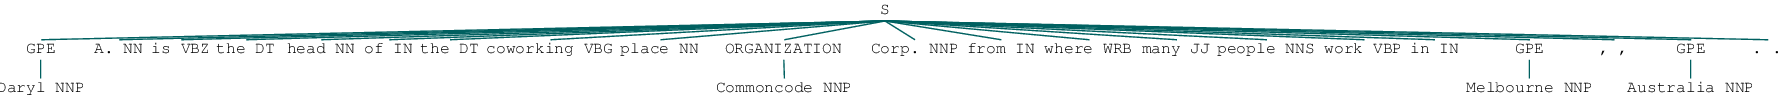

In [86]:
ne_chunk(pos_tags)

<h1> Excercise A: Frequency Distribution of Words, Lenguage Models </h1>
<hr>
<h2><li> Lets track the last month messages from our campfire chat room</li></h2>
<h2><li> Lets see most used words</li></h2>
<h2><li> And generate very probable "random" sentences </li></h2>

In [87]:
# from camplight import Request, Campfire
# from settings import CAMPFIRE_BOT

# campfire_request = Request('https://commoncode.campfirenow.com', CAMPFIRE_BOT)
# campfire = Campfire(campfire_request)

# room = campfire.room('Common Code')
# room.join()

# alldays = []
# for i in range(1,30):
#     day = room.transcript("2013/07/" + str(i))
#     alldays.extend(day)
    
# import pickle

# fopen = open('transcript.july','r')
# alldays = pickle.load(fopen)

# len(alldays)

In [88]:
# import pandas as pd

# df = pd.DataFrame(alldays)

# df = df[df.body.notnull()] 
# df = df[df.user_id != 1297189] #removing null messages
# df

In [89]:
# from nltk.corpus import stopwords

# stops = stopwords.words('english')
# stops.extend('.,[,],,,(,),;,\',?,",:,<,>,n\'t,|,#,\'s,\",\'re,\'ve,\'ll,\'d,\'re'.split(','))

# freq_dist = nltk.FreqDist()
# for message in df.body:
#     for word in word_tokenize(message):
#         if word not in stops:
#             freq_dist.inc(word)
            
# import matplotlib
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5,10.5)
# freq_dist.plot(10,50,title="Test", figure=fig)

<h3> Language Model </h3>
<h2> A statical language model, its a set of probabilities asociated with words, and its occurrances in differentes sentences (Context of other words), in text. We will train some model with text, and from this model we will generate artificial sentences based on the probability of words to appear together. 

In [90]:
# words = []
# for message in df.body:
#     for word in word_tokenize(message):
#         words.append(word)

# text_model = nltk.Text(words)
# text_model.generate(100)

<h1> Can We use NLTK data for create a Language Model? Sure! </h1>

In [91]:
# moby = nltk.Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))

In [92]:
# moby.generate(60)

<h2>Sentiment Analyisis</h2> 
<hr>

<h3> Is a phrase expresing a positive opinion? a negative opinion? how can we measure that? <h3>
    <h3> We will decompose sentences into their smaller units: tokens, and we will measure how probable they distribute on positive/negative sentences along the text. 

<h2>Before proceeding I need to explain something. Classification</h2>

<h3>In machine learning and statistics, classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known.  The individual observations are analyzed into a set of quantifiable properties, known as various explanatory variables, features, etc.</h3>

<h3> Looking the diagram. </h3>
<h3><li> categories: Circle, Square</li></h3>
<h3><li> new observation: new point in the 2D map </li></h3>
<h3><li> features: IQ, Test Score. </li></h3>

<img height=500px width=600px src="http://georgemdallas.files.wordpress.com/2013/06/ml4.png">

In [93]:
#We will use movie reviews, already separated as positive and negative. Specially interest are those bigrams, 
#that are in positive or negative sentences (pair of words (word1, word2) that appear consecutives.)
from nltk.corpus import movie_reviews

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews

#This is the function that given a word, return a dict {word:True}. This will be our feature in the classifier. 
def word_feats(words):
    return dict([(word, True) for word in words])

#neg_ids, pos_ids keep all the files for negative reviews, and positive reviews respectively.
neg_ids = movie_reviews.fileids('neg')
pos_ids = movie_reviews.fileids('pos')

#So, lets take the positive/negative words, create the feature for such word, and store it in a negative/positive features list.
neg_feats = [(word_feats(movie_reviews.words(fileids=[f])), 'neg') for f in neg_ids]
pos_feats = [(word_feats(movie_reviews.words(fileids=[f])), 'pos') for f in pos_ids]

#Separating 3/4 of this featured words for training, 1/4 for test. 
neg_len_train = len(neg_feats)*3/4
pos_len_train = len(pos_feats)*3/4

train_feats = neg_feats[:neg_len_train] + pos_feats[:pos_len_train]
test_feats = neg_feats[neg_len_train:] + pos_feats[pos_len_train:]

#training a NaiveBayes Classifier with our training featured words.
classifier = NaiveBayesClassifier.train(train_feats)

#Lts check accuracy.
print 'accuracy: ', nltk.classify.util.accuracy(classifier, test_feats)

#Lets see which words fit best in each class.
classifier.show_most_informative_features()


accuracy:  0.806603773585
Most Informative Features
                Received = True              pos : neg    =    109.6 : 1.0
           Corresponding = True              pos : neg    =    104.1 : 1.0
                elsevier = True              pos : neg    =     87.9 : 1.0
                     Tel = True              pos : neg    =     86.4 : 1.0
                   front = True              pos : neg    =     80.3 : 1.0
                  passed = True              pos : neg    =     80.3 : 1.0
                      /$ = True              pos : neg    =     78.7 : 1.0
                homepage = True              pos : neg    =     77.2 : 1.0
                Accepted = True              pos : neg    =     73.9 : 1.0
                    oven = True              pos : neg    =     72.0 : 1.0


In [94]:
# sentence = "Colin is so miserable, it makes me amazing"
# tokens = [word for word in word_tokenize(sentence) if word not in stops]

# pos_tags = [pos for pos in pos_tag(tokens)]

# pos_tags

In [95]:
feats = word_feats( [word for (word,_) in pos_tags] )
feats

{',': True,
 '.': True,
 'A.': True,
 'Australia': True,
 'Commoncode': True,
 'Corp.': True,
 'Daryl': True,
 'Melbourne': True,
 'coworking': True,
 'from': True,
 'head': True,
 'in': True,
 'is': True,
 'many': True,
 'of': True,
 'people': True,
 'place': True,
 'the': True,
 'where': True,
 'work': True}

In [96]:
classifier.classify(feats)

'neg'

In [97]:
# sentence = "Luchux is a miserable presenter, a destructor of devices and a horrible designer"
# tokens = [word for word in word_tokenize(sentence) if word not in stops]

# pos_tags = [pos for pos in pos_tag(tokens) if pos[1] == 'JJ']

# pos_tags

In [98]:
feats = word_feats( [word for (word,_) in pos_tags] )
feats

{',': True,
 '.': True,
 'A.': True,
 'Australia': True,
 'Commoncode': True,
 'Corp.': True,
 'Daryl': True,
 'Melbourne': True,
 'coworking': True,
 'from': True,
 'head': True,
 'in': True,
 'is': True,
 'many': True,
 'of': True,
 'people': True,
 'place': True,
 'the': True,
 'where': True,
 'work': True}

In [99]:
classifier.classify(feats)

'neg'

<h1> Another Excercise: Classifying News Documents in Categories: sport, humor, adventure, science fiction, etc... </h1> 

In [100]:
from nltk.corpus import brown
from random import shuffle
from  nltk import NaiveBayesClassifier
from nltk import FreqDist
from nltk.classify import accuracy,apply_features
from nltk.corpus import stopwords

#given a document extract features (the presence or not of the best1500 top 1500 of freqDist of corpora)
def document_features(doc):
    doc_set_words = set(doc)
    features_dic = {} #features is a dictionary
    for word in best1500_words_corpora:
        features_dic['has(%s)' % word] = (word in doc_set_words)
    return features_dic

#Word frecuency of words in corpora. 
#Return the top 1500 most used words.
def init_corpora():
    words_in_corpora = FreqDist(w.lower() for w in brown.words())
    best1500 = words_in_corpora.keys()[:1500]
    return  nonstop(best1500)

#Receives a list of words, and remove those in stopwords.
def nonstop(listwords):
    return [word for word in listwords if word not in stopw]
  

stopw = stopwords.words('english')

best1500_words_corpora = init_corpora()
documents = [( list(nonstop(brown.words(fileid)) ),categoria) for categoria in brown.categories() for fileid in brown.fileids(categoria)]
shuffle(documents)
#print len(documents)
#print documents
doc_features_set = [(document_features(d),c) for (d,c) in documents]
#print len(doc_features_set)
train_set = doc_features_set[:350]
#train_set = apply_features(document,features,doc_features_set[:200])
test_set  = doc_features_set[150:]
classifier = NaiveBayesClassifier.train(train_set)
classifier.show_most_informative_features(30)

Most Informative Features
              has(can't) = True           scienc : learne =     30.3 : 1.0
              has(music) = True           review : learne =     22.7 : 1.0
              has(crowd) = True           scienc : learne =     21.7 : 1.0
             has(wooden) = True            humor : belles =     14.5 : 1.0
        has(impressions) = True           scienc : belles =     14.0 : 1.0
               has(pull) = True           scienc : belles =     14.0 : 1.0
        has(specialists) = True           scienc : belles =     14.0 : 1.0
             has(bubble) = True           scienc : belles =     14.0 : 1.0
         has(straighten) = True           scienc : belles =     14.0 : 1.0
            has(illness) = True           scienc : belles =     14.0 : 1.0
          has(corporate) = True           scienc : belles =     14.0 : 1.0
           has(disgrace) = True           scienc : belles =     14.0 : 1.0
               has(lots) = True           scienc : belles =     14.0 : 1.0

In [101]:
#We expect Adventura as 'cn02' contains words of a books of adventures
print classifier.classify(document_features(brown.words('cn02')))
#print accuracy(classifier,test_set)

adventure
